<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-leo0nel09/blob/main/Ago25-26/Tarea_23_de_agosto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Crear una función que ajuste los pesos para un modelo dado como argumento el grado del polinomio ajustado. La función debe devolver el costo total en el conjunto de datos dado como entrenamiento.
Crear una función que calcule el costo de un modelo ya ajustado pero ahora en el conjunto de validación.
Hacer una gráfica del costo en el conjunto de entrenamiento Vs el grado del polinomio y otra del costo en el conjunto de validación Vs el grado del polinomio.
Hacer una función qué calcule el costo de cross-validación con K=N y graficar el costo de cross-validación como función del grado del polinomio.
Trabajar hasta el grado igual 8 en todos los casos.

CONCLUSION PERSONAL: ESPERARE A LA RETROALIMENTACION DEL PROBLEMA EN CLASE PORQUE NO COMPRENDI BIEN LOS CONCEPTOS, ME AYUDE DE FOROS Y OTRA INFORMACION EN LINEA PERO NO RELACIONO BIEN LOS CONCEPTOS IMPLEMENTADOS EN ESTE CODIGO.

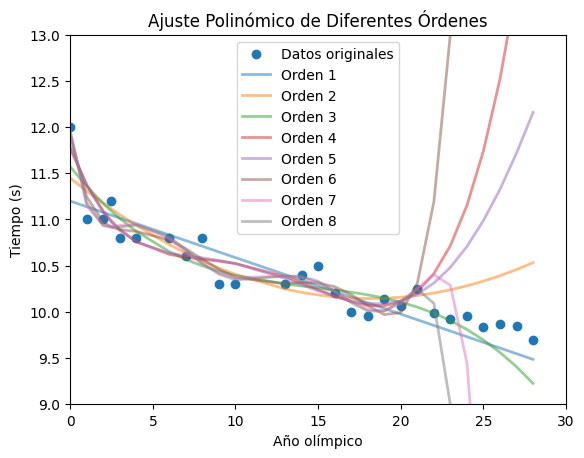

In [87]:
import numpy as np
import matplotlib.pyplot as plt

def regresion_polinomica(x, y, grado):
    # Crear matriz de diseño
    X = np.vander(x, grado + 1, increasing=True)
    t = y
    XX = np.dot(X.T, X)
    invXX = np.linalg.inv(XX)
    Xt = np.dot(X.T, t)
    w = np.dot(invXX, Xt)

    # Calcular los valores predichos usando los pesos w
    y_pred = np.dot(X, w)

    # Calcular el error cuadrático medio
    mse = np.mean((y_pred - y)**2)

    return w, mse

# Cargar los datos
data = np.loadtxt("/content/olympic100m_men.txt", delimiter=",").T
x = data[0]
y = data[1]

# Preprocesar los años para que estén en una escala manejable
x = (x - 1896) / 4

# Número máximo de grados polinómicos para ajuste
grado_maximo = 8

plt.scatter(x, y, label="Datos originales")

for grado in range(1, grado_maximo + 1):
    w_test, costo = regresion_polinomica(x[:20], y[:20], grado)
    curva_ajustada = np.zeros_like(x)

    for i in range(len(w_test)):
        curva_ajustada += w_test[i] * x**i

    plt.plot(x, curva_ajustada, '-', linewidth=2, label=f'Orden {grado}', alpha=0.5)

# Ajustar límites del eje Y
plt.ylim(9, 13)
plt.xlim(0, 30)

plt.legend()
plt.xlabel('Año olímpico')
plt.ylabel('Tiempo (s)')
plt.title('Ajuste Polinómico de Diferentes Órdenes')
plt.show()



Dividi los datos en 20, los primeros para prueba y los siguientes para valdiacion

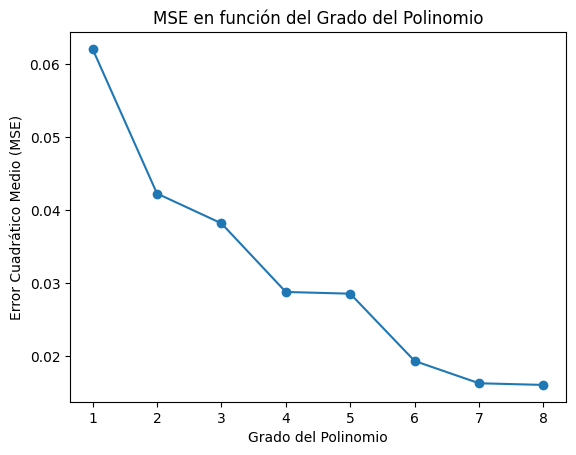

In [88]:
mse_values = []

for grado in range(1, grado_maximo + 1):
    w_test, mse = regresion_polinomica(x[:20], y[:20], grado)
    mse_values.append(mse)

# Graficar el MSE en función del grado del polinomio
plt.plot(range(1, grado_maximo + 1), mse_values, marker='o')
plt.xlabel('Grado del Polinomio')
plt.ylabel('Error Cuadrático Medio (MSE)')
plt.title('MSE en función del Grado del Polinomio')
plt.show()


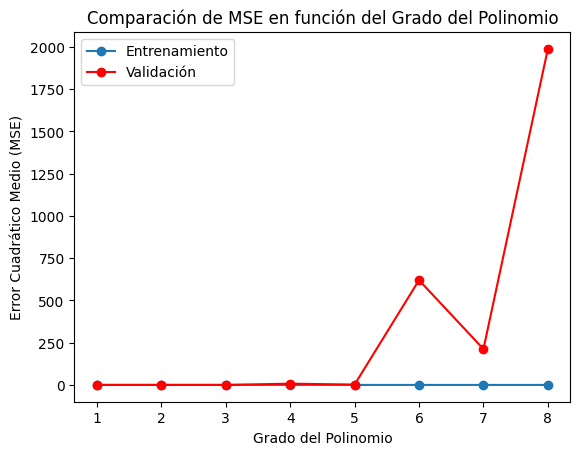

In [98]:


mse_values = []
mse_values_validation = []

for grado in range(1, grado_maximo + 1):
    w_train, _ = regresion_polinomica(x_train, y_train, grado)
    mse_train = np.mean((np.dot(np.vander(x_train, grado + 1, increasing=True), w_train) - y_train)**2)
    mse_values.append(mse_train)

    mse_val = calcular_costo_validacion(x_val, y_val, w_train, grado)
    mse_values_validation.append(mse_val)

# Graficar el MSE en función del grado del polinomio para el conjunto de entrenamiento y validación
plt.plot(range(1, grado_maximo + 1), mse_values, marker='o', label='Entrenamiento')
plt.plot(range(1, grado_maximo + 1), mse_values_validation, marker='o', color='red', label='Validación')
plt.xlabel('Grado del Polinomio')
plt.ylabel('Error Cuadrático Medio (MSE)')
plt.title('Comparación de MSE en función del Grado del Polinomio')
plt.legend()
plt.show()




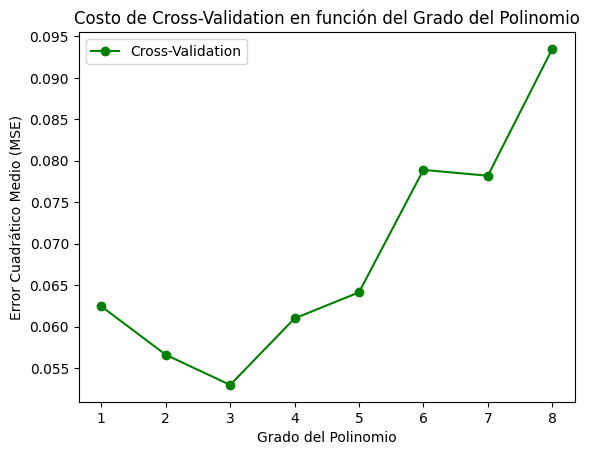

In [99]:
def cross_validation_cost(x, y, grado):
    N = len(x)
    total_mse = 0

    for i in range(N):
        x_train = np.delete(x, i)
        y_train = np.delete(y, i)
        x_val = x[i]
        y_val = y[i]

        w_train, _ = regresion_polinomica(x_train, y_train, grado)
        mse_val = calcular_costo_validacion(np.array([x_val]), np.array([y_val]), w_train, grado)
        total_mse += mse_val

    avg_mse = total_mse / N
    return avg_mse

# Calcular el costo de cross-validación para diferentes grados
cross_val_mse_values = []

for grado in range(1, grado_maximo + 1):
    cv_mse = cross_validation_cost(x, y, grado)
    cross_val_mse_values.append(cv_mse)

# Graficar el costo de cross-validación en función del grado del polinomio
plt.plot(range(1, grado_maximo + 1), cross_val_mse_values, marker='o', color='green', label='Cross-Validation')
plt.xlabel('Grado del Polinomio')
plt.ylabel('Error Cuadrático Medio (MSE)')
plt.title('Costo de Cross-Validation en función del Grado del Polinomio')
plt.legend()
plt.show()
